In [17]:
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np
import os
import cv2

# Loading Model

In [10]:
new_model = load_model(os.path.join("Models", "Only_synthetic.keras"))

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


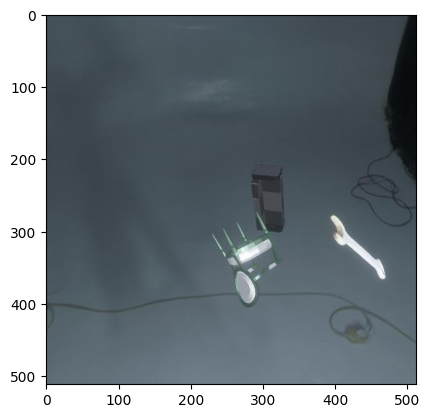

In [25]:
# img = cv2.imread("data/Hammer/IMG_0676.JPEG")
# img = cv2.imread("data/Screwdriver/IMG_0527.JPEG")

# img = cv2.imread("data/CombWrench/IMG_0626.JPEG")
# img = cv2.imread("data/CombWrench/IMG_0601.JPEG")
# img = cv2.imread("data/Wrench/IMG_0578.JPEG")

img = cv2.imread("Data/Synthetic/CombWrench/17521_img.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

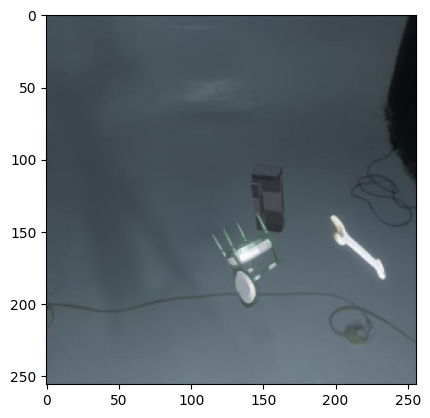

In [26]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [27]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [28]:
yhat

array([[9.7826654e-03, 9.8821068e-01, 2.0066476e-03, 4.7193812e-16]],
      dtype=float32)

In [29]:
np.argmax(yhat)

1